<a href="https://colab.research.google.com/github/Maneeshkumar08/My-project-/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_path = '/content/drive/MyDrive/breastcancerdataset.zip'
extract_path = '/content/BreaKHis'

In [ ]:
import zipfile, os

if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Extracted contents to: {extract_path}")
else:
    print("Dataset already extracted.")

Extracted contents to: /content/BreaKHis


In [ ]:
dataset_dir = '/content/BreaKHis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast'

print("Checking dataset structure...")
for f in os.listdir(dataset_dir):
    print(f)

Checking dataset structure...
README.txt
benign
malignant
count_files.sh


In [ ]:
import pathlib

all_images = list(pathlib.Path(dataset_dir).rglob('*.png'))
print(f"\n Total image files found: {len(all_images)}")

print("\nSample image paths:")
for img in all_images[:5]:
    print(img)



 Total image files found: 7909

Sample image paths:
/content/BreaKHis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-29960AB/200X/SOB_B_F-14-29960AB-200-018.png
/content/BreaKHis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-29960AB/200X/SOB_B_F-14-29960AB-200-015.png
/content/BreaKHis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-29960AB/200X/SOB_B_F-14-29960AB-200-007.png
/content/BreaKHis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-29960AB/200X/SOB_B_F-14-29960AB-200-006.png
/content/BreaKHis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-29960AB/200X/SOB_B_F-14-29960AB-200-016.png


In [ ]:
import pandas as pd

records = []
for path in all_images:
    parts = path.parts
    label = 'benign' if 'benign' in parts else 'malignant'
    subtype = parts[-5]
    magnification = parts[-2]
    records.append((str(path), label, subtype, magnification))

df = pd.DataFrame(records, columns=['path', 'label', 'subtype', 'magnification'])
print("\nDataFrame created successfully!")
print(df.head())

NameError: name 'all_images' is not defined

In [ ]:
print("\n Summary Information:")
print("Total images:", len(df))
print("\nClass distribution:")
print(df['label'].value_counts())
print("\nSubtype distribution:")
print(df['subtype'].value_counts())
print("\nMagnification distribution:")
print(df['magnification'].value_counts())


 Summary Information:


NameError: name 'df' is not defined

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

print("\n Basic dataset overview:")
print(df.describe(include='all'))
print("\nUnique magnifications:", df['magnification'].unique())


 Basic dataset overview:


NameError: name 'df' is not defined

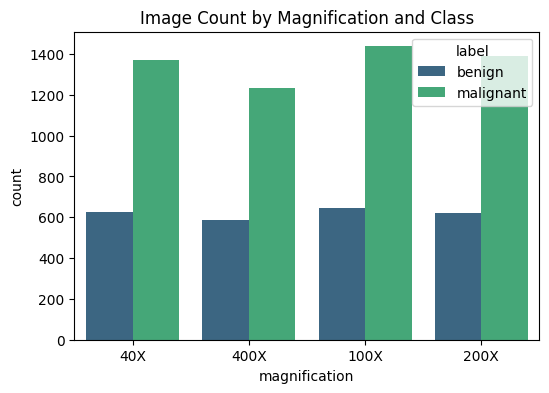

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='magnification', data=df, hue='label', palette='viridis')
plt.title('Image Count by Magnification and Class')
plt.show()

/tmp/ipython-input-4031147241.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='coolwarm')


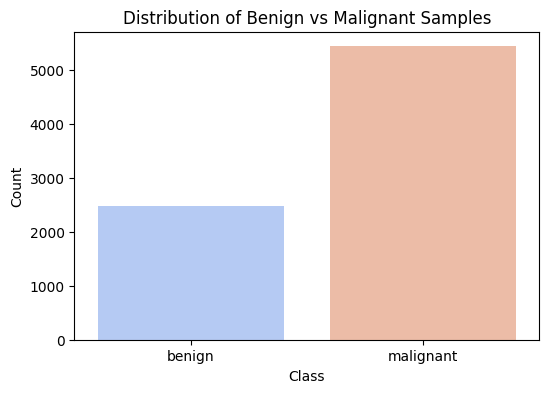

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='coolwarm')
plt.title('Distribution of Benign vs Malignant Samples')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


 Benign examples:


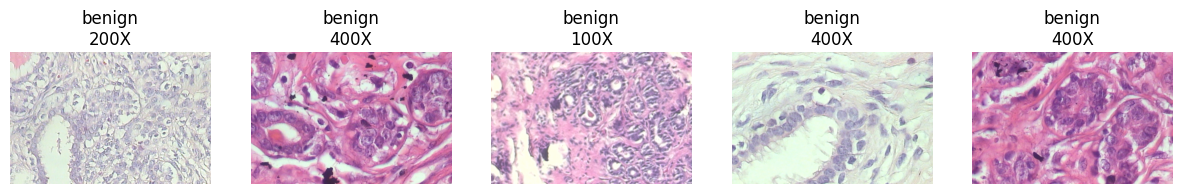


 Malignant examples:


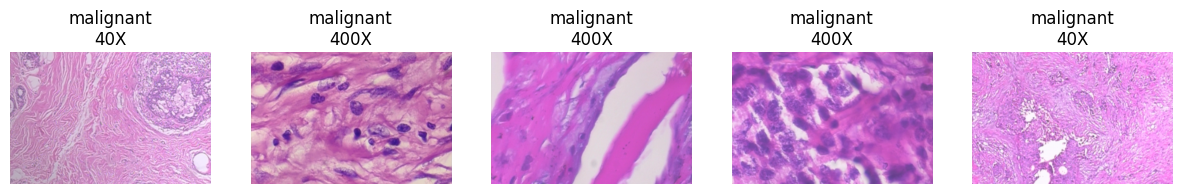

In [ ]:
import random
from matplotlib.image import imread

def show_random_images(df, label, n=5):
    subset = df[df['label'] == label].sample(n)
    plt.figure(figsize=(15,3))
    for i, (_, row) in enumerate(subset.iterrows()):
        img = imread(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{label}\n{row['magnification']}")
    plt.show()

print("\n Benign examples:")
show_random_images(df, 'benign', 5)

print("\n Malignant examples:")
show_random_images(df, 'malignant', 5)

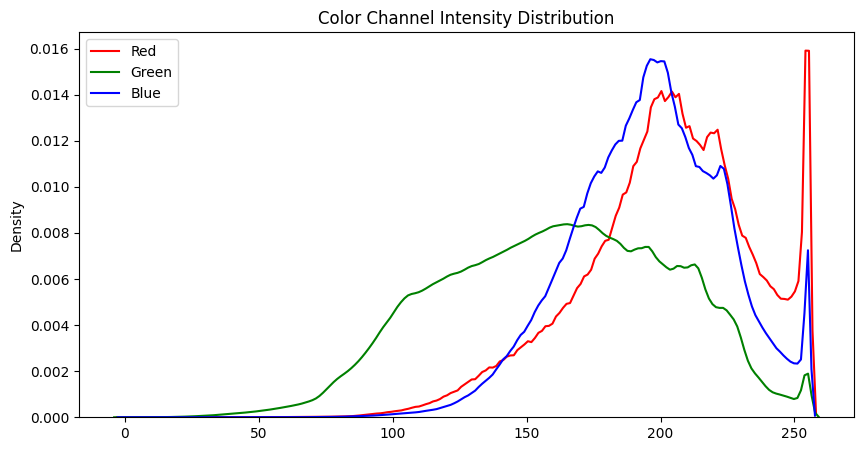

In [ ]:
sample_images = random.sample(df['path'].tolist(), 100)

r_vals, g_vals, b_vals = [], [], []
for img_path in sample_images:
    img = cv2.imread(img_path)
    if img is not None:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        r_vals.extend(img_rgb[:,:,0].flatten())
        g_vals.extend(img_rgb[:,:,1].flatten())
        b_vals.extend(img_rgb[:,:,2].flatten())

plt.figure(figsize=(10,5))
sns.kdeplot(r_vals, color='r', label='Red')
sns.kdeplot(g_vals, color='g', label='Green')
sns.kdeplot(b_vals, color='b', label='Blue')
plt.title('Color Channel Intensity Distribution')
plt.legend()
plt.show()


 Average Benign Tissue:


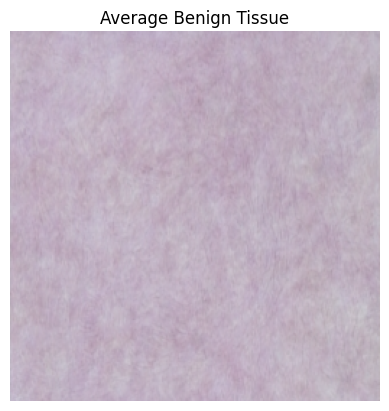


 Average Malignant Tissue:


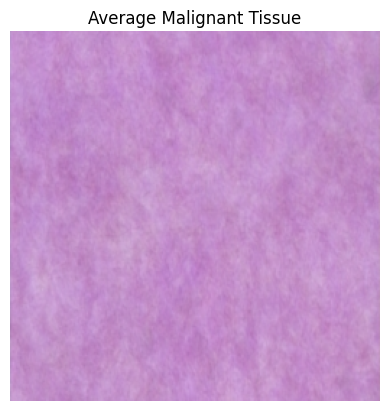

In [ ]:
import numpy as np

def compute_average_image(df_subset, title):
    imgs = []
    for img_path in random.sample(df_subset['path'].tolist(), 30):
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (256,256))
            imgs.append(img.astype(np.float32) / 255.0)
    avg_img = np.mean(imgs, axis=0)
    plt.imshow(avg_img)
    plt.title(title)
    plt.axis('off')
    plt.show()

print("\n Average Benign Tissue:")
compute_average_image(df[df['label']=='benign'], 'Average Benign Tissue')

print("\n Average Malignant Tissue:")
compute_average_image(df[df['label']=='malignant'], 'Average Malignant Tissue')